## Contents
- import libraries and datasets  
- exploring missing values  
- correlations  
- category plots  
- exporting df

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# displays charts in notebook
%matplotlib inline

In [3]:
path = r"C:\Users\Kieran\Documents\Career Foundry\Data Immersion\6.0 Advanced Analyics & Dashboard Design"

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'covid_full.csv'))

### Exploring missing values

In [5]:
df.isnull().sum()

Unnamed: 0                                   0
iso_code                                     0
continent                                 3580
location                                     0
date                                         0
total_cases                                964
new_cases                                  966
new_cases_smoothed                        1967
total_deaths                             10054
new_deaths                                9896
new_deaths_smoothed                       1967
total_cases_per_million                   1353
new_cases_per_million                     1355
new_cases_smoothed_per_million            2351
total_deaths_per_million                 10430
new_deaths_per_million                   10272
new_deaths_smoothed_per_million           2351
reproduction_rate                        14091
icu_patients                             64483
icu_patients_per_million                 64483
hosp_patients                            62939
hosp_patients

In [6]:
#Return the total missing values and the percentage of missing values by column.
def show_missing(df):
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    return pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})

In [7]:
show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
Unnamed: 0,0,0.000000,0,0.0,0,0.0
iso_code,0,0.000000,0,0.0,0,0.0
continent,3580,4.965601,0,0.0,0,0.0
location,0,0.000000,0,0.0,0,0.0
date,0,0.000000,0,0.0,0,0.0
total_cases,964,1.337106,0,0.0,0,0.0
new_cases,966,1.339880,0,0.0,0,0.0
new_cases_smoothed,1967,2.728307,0,0.0,0,0.0
total_deaths,10054,13.945295,0,0.0,0,0.0
new_deaths,9896,13.726143,0,0.0,0,0.0


Looking for whole rows with all na values:

In [8]:
df_2 = df.dropna()

In [9]:
df_2.shape

(0, 60)

This suggests that no rows contain entirley na values. However the unnamed, iso_code, location and date columns have observations for every row. I will discount these and check again to see if any rows are entirley na. 

In [10]:
df_check = df.drop(['Unnamed: 0', 'iso_code', 'location', 'date'], axis=1)

In [11]:
#checking new df for entire na rows
df_3 = df_check.dropna()

In [12]:
df_3.shape

(0, 56)

There are still no entire rows of nan values. I will proceed without deleting any rows.

### Correlations

In [13]:
df.corr()

,Unnamed: 0,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
Unnamed: 0,1.000000,0.070745,0.081155,0.082239,0.093324,0.098217,0.089262,-0.014086,-0.004461,-0.005321,...,0.079367,0.045142,0.035782,0.035743,-0.058647,0.028064,0.017607,-0.002458,0.017254,0.007036
total_cases,0.070745,1.000000,0.887714,0.905806,0.980456,0.859382,0.891367,0.140104,0.071540,0.087230,...,0.017355,-0.032773,-0.033669,0.021410,-0.002602,-0.009982,0.029973,-0.008674,0.019731,0.034969
new_cases,0.081155,0.887714,1.000000,0.988927,0.906407,0.923808,0.920585,0.118313,0.114951,0.123225,...,0.024251,-0.038948,-0.040222,0.022002,0.003841,-0.008944,0.033422,-0.005064,0.026117,0.044485
new_cases_smoothed,0.082239,0.905806,0.988927,1.000000,0.921738,0.915502,0.936638,0.121766,0.104116,0.125182,...,0.024476,-0.039275,-0.040575,0.022349,0.003792,-0.009110,0.033711,-0.005218,0.026300,0.044874
total_deaths,0.093324,0.980456,0.906407,0.921738,1.000000,0.892072,0.924282,0.123635,0.063038,0.074991,...,0.015692,-0.042019,-0.045068,0.027305,-0.003980,-0.010727,0.040383,-0.013048,0.026066,0.041503
new_deaths,0.098217,0.859382,0.923808,0.915502,0.892072,1.000000,0.970835,0.101206,0.083591,0.091501,...,0.017316,-0.045628,-0.045714,0.029290,-0.001050,-0.006133,0.044466,-0.007889,0.027771,0.046271
new_deaths_smoothed,0.089262,0.891367,0.920585,0.936638,0.924282,0.970835,1.000000,0.114077,0.080040,0.098923,...,0.021284,-0.046069,-0.048460,0.022447,0.002604,-0.011545,0.041846,-0.006504,0.029789,0.048711
total_cases_per_million,-0.014086,0.140104,0.118313,0.121766,0.123635,0.101206,0.114077,1.000000,0.581294,0.707438,...,0.323496,-0.262840,-0.169450,0.051749,0.285560,0.018501,0.339540,0.130429,0.324872,0.336932
new_cases_per_million,-0.004461,0.071540,0.114951,0.104116,0.063038,0.083591,0.080040,0.581294,1.000000,0.838030,...,0.232319,-0.225841,-0.122807,0.017330,0.299506,0.038530,0.273018,0.145073,0.260267,0.291538
new_cases_smoothed_per_million,-0.005321,0.087230,0.123225,0.125182,0.074991,0.091501,0.098923,0.707438,0.838030,1.000000,...,0.264737,-0.253022,-0.140520,0.019981,0.339859,0.042885,0.313124,0.164588,0.310591,0.332734


I have a very large number of variables which are similair. I will create a new df with a selection of variables, e.g per million rather than absoloute values.

In [14]:
df_trim = df[['total_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations_smoothed_per_million', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']].copy()

In [15]:
corr_mat = df_trim.corr()

In [16]:
corr_mat

,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,weekly_icu_admissions_per_million,weekly_hosp_admissions_per_million,total_tests_per_thousand,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases_per_million,1.000000,0.707438,0.815706,0.587441,-0.027010,0.649911,0.621835,0.586688,0.354352,0.632979,...,0.323496,-0.262840,-0.169450,0.051749,0.285560,0.018501,0.339540,0.130429,0.324872,0.336932
new_cases_smoothed_per_million,0.707438,1.000000,0.560513,0.689191,0.079144,0.703746,0.727985,0.674672,0.475656,0.464487,...,0.264737,-0.253022,-0.140520,0.019981,0.339859,0.042885,0.313124,0.164588,0.310591,0.332734
total_deaths_per_million,0.815706,0.560513,1.000000,0.616375,-0.042766,0.559510,0.571299,0.362360,0.261574,0.332647,...,0.238277,-0.295537,-0.221301,-0.034235,0.367558,-0.021630,0.313575,0.125892,0.356713,0.360242
new_deaths_smoothed_per_million,0.587441,0.689191,0.616375,1.000000,-0.007126,0.886199,0.899568,0.628530,0.471304,0.268519,...,0.171845,-0.252706,-0.134745,-0.029148,0.349002,0.014508,0.255775,0.152391,0.270557,0.299502
reproduction_rate,-0.027010,0.079144,-0.042766,-0.007126,1.000000,-0.211767,-0.184714,-0.066966,-0.032014,-0.072879,...,0.067910,-0.155212,-0.054396,-0.050261,0.123550,-0.003881,0.117911,0.084242,0.143679,0.164125
icu_patients_per_million,0.649911,0.703746,0.559510,0.886199,-0.211767,1.000000,0.894658,0.674776,0.517946,0.249798,...,-0.051775,0.166656,0.033957,0.091443,0.193041,0.084730,NaN,0.166380,-0.056414,-0.105090
hosp_patients_per_million,0.621835,0.727985,0.571299,0.899568,-0.184714,0.894658,1.000000,0.658405,0.711062,0.218397,...,-0.189466,0.260484,0.202445,0.001252,0.226394,0.161131,NaN,0.254126,-0.191775,-0.278988
weekly_icu_admissions_per_million,0.586688,0.674672,0.362360,0.628530,-0.066966,0.674776,0.658405,1.000000,0.907957,0.440298,...,-0.253519,-0.025947,0.181480,0.008582,0.072355,0.157599,NaN,0.315810,-0.166890,-0.182049
weekly_hosp_admissions_per_million,0.354352,0.475656,0.261574,0.471304,-0.032014,0.517946,0.711062,0.907957,1.000000,0.104456,...,-0.212475,0.495838,0.268841,0.099001,0.148677,0.124226,NaN,0.196098,-0.217935,-0.263714
total_tests_per_thousand,0.632979,0.464487,0.332647,0.268519,-0.072879,0.249798,0.218397,0.440298,0.104456,1.000000,...,0.435073,-0.205726,-0.131865,0.112970,0.194755,0.024464,0.325076,0.067780,0.288386,0.341037


### Correlation heatmap using seaborn

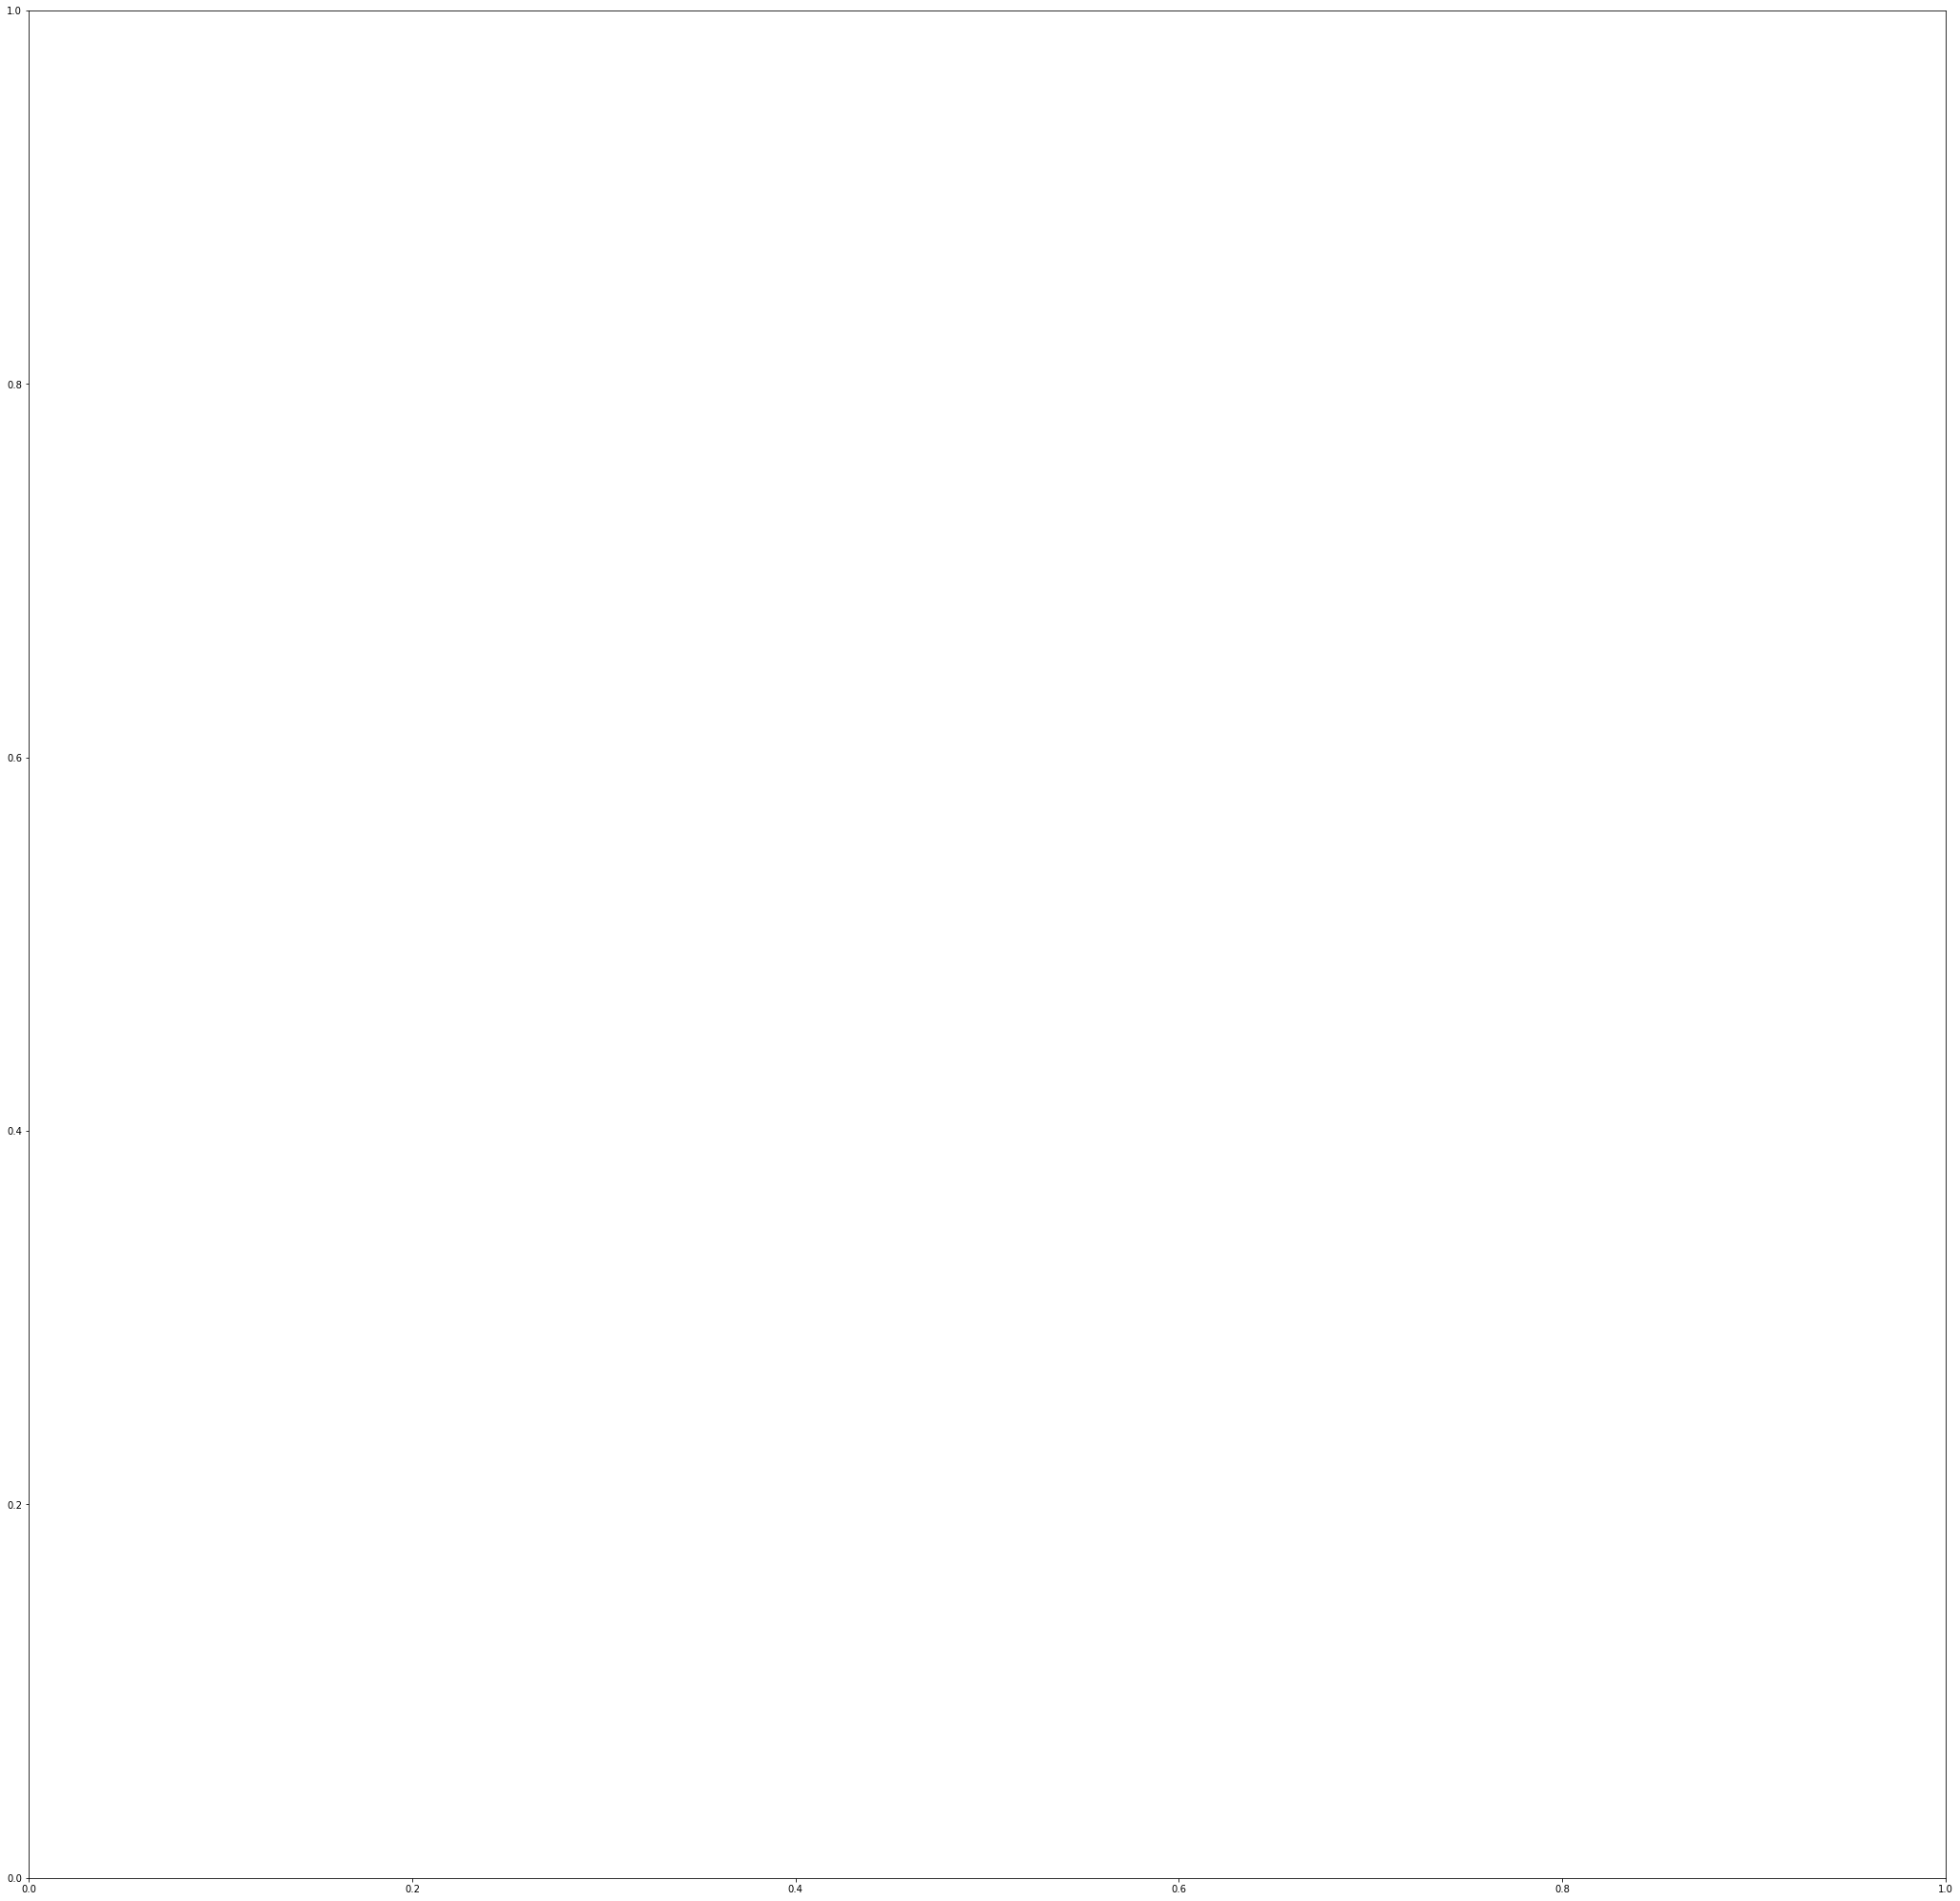

In [17]:
#empty subplot
f,ax = plt.subplots(figsize=(36,36))

In [18]:
corr = sns.heatmap(corr_mat, annot = True, ax = ax, fmt='.1g', vmin=-1, vmax=1, center=0)

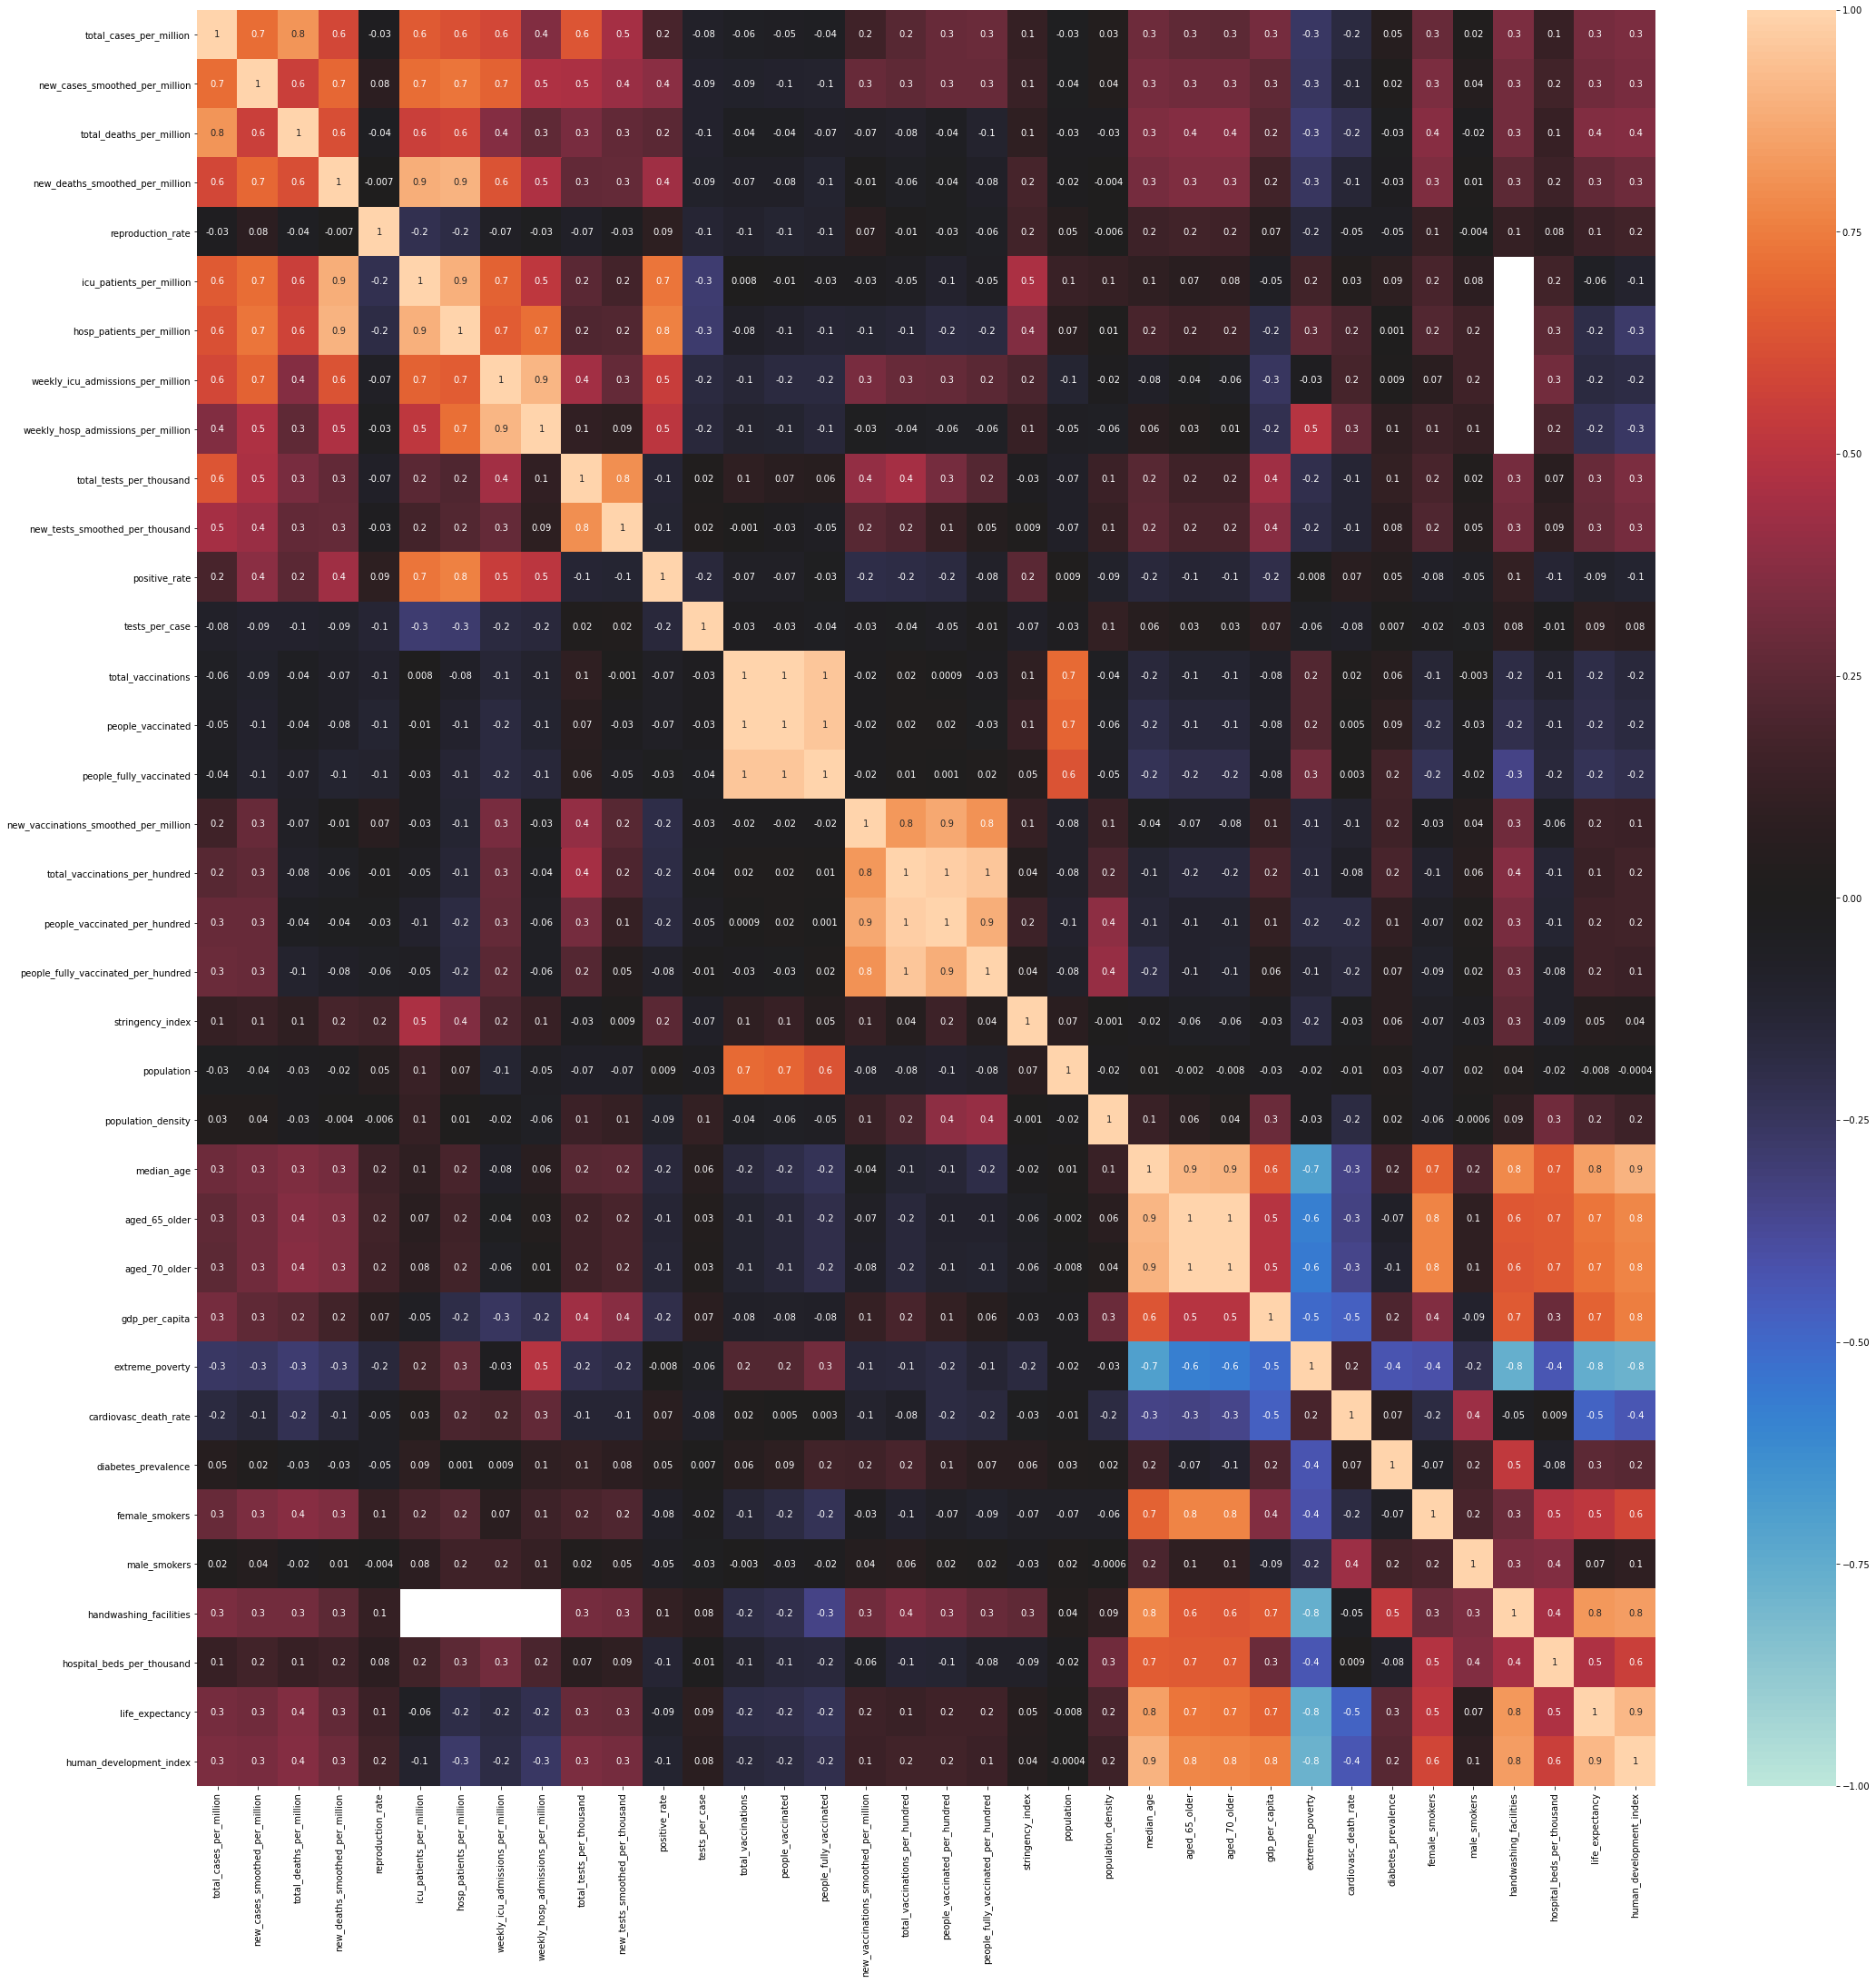

In [19]:
corr.figure

In [20]:
corr.figure.savefig(os.path.join(path, '04 Analysis', 'corr.png'))

Clearly there are too many variables for this to be a useful map.

In [21]:
# convert corr matrix to 1D series and sort
sorted_mat = corr_mat.unstack().sort_values()
sorted_mat

extreme_poverty                     human_development_index              -0.778127
human_development_index             extreme_poverty                      -0.778127
extreme_poverty                     handwashing_facilities               -0.760018
handwashing_facilities              extreme_poverty                      -0.760018
extreme_poverty                     life_expectancy                      -0.752199
                                                                            ...   
weekly_hosp_admissions_per_million  handwashing_facilities                     NaN
handwashing_facilities              icu_patients_per_million                   NaN
                                    hosp_patients_per_million                  NaN
                                    weekly_icu_admissions_per_million          NaN
                                    weekly_hosp_admissions_per_million         NaN
Length: 1296, dtype: float64

In [22]:
# just keeping the upper triangle 
upper_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))

In [23]:
#drop na values
unique_up_mat = upper_corr_mat.unstack().dropna()

In [24]:
sorted_up_mat = unique_up_mat.sort_values()
sorted_up_mat

human_development_index        extreme_poverty                  -0.778127
handwashing_facilities         extreme_poverty                  -0.760018
life_expectancy                extreme_poverty                  -0.752199
extreme_poverty                median_age                       -0.698271
                               aged_65_older                    -0.573439
                                                                   ...   
people_fully_vaccinated        total_vaccinations                0.955612
                               people_vaccinated                 0.956802
people_vaccinated_per_hundred  total_vaccinations_per_hundred    0.979615
aged_70_older                  aged_65_older                     0.994824
people_vaccinated              total_vaccinations                0.995429
Length: 626, dtype: float64

I will look sorted_up_mat in excel to find the variables with the highest correlations and build a df with just those variables for further analysis. I am looking for 10-15 of the most interesting/highly correlated variables. 

In [25]:
#exporting sorted correlation values
sorted_up_mat.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'sorted_corr.csv'))

### Selecting variables
I have decided to select variables that will be of particualr interest.  
4 dependent variables measuring covid impact:  
new_cases_smoothed_per_million  
total_deaths_per_million  
hosp_patients_per_million  
people_vaccinated_per_hundred  

And 13 explanatory variables:    
handwashing_facilities  
human_development_index  
life_expectancy  
stringency_index  
gdp_per_capita  
aged_70_older  
aged_65_older  
population_density 
population  
median_age 
cardiovasc_death_rate  
diabetes_prevalence  
extreme_poverty 


In [26]:
df.columns

Index(['Unnamed: 0', 'iso_code', 'continent', 'location', 'date',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccin

In [27]:
df_refine = df[['continent', 'location', 'date', "new_cases_smoothed_per_million",
"total_deaths_per_million",
"hosp_patients_per_million",
"people_vaccinated_per_hundred",
"handwashing_facilities",
"human_development_index",
"life_expectancy",
"stringency_index",
"gdp_per_capita",
"aged_70_older",
"aged_65_older",
"population_density",
"population",
"median_age",
"cardiovasc_death_rate",
"diabetes_prevalence",
"extreme_poverty",
]]

In [28]:
df_refine.shape

(72096, 20)

In [29]:
corr_refine = df_refine.corr()
corr_refine

,new_cases_smoothed_per_million,total_deaths_per_million,hosp_patients_per_million,people_vaccinated_per_hundred,handwashing_facilities,human_development_index,life_expectancy,stringency_index,gdp_per_capita,aged_70_older,aged_65_older,population_density,population,median_age,cardiovasc_death_rate,diabetes_prevalence,extreme_poverty
new_cases_smoothed_per_million,1.000000,0.560513,0.727985,0.285107,0.313124,0.332734,0.310591,0.132933,0.264737,0.311953,0.312455,0.038622,-0.035418,0.323474,-0.140520,0.019981,-0.253022
total_deaths_per_million,0.560513,1.000000,0.571299,-0.044174,0.313575,0.360242,0.356713,0.098767,0.238277,0.368664,0.364256,-0.026221,-0.029892,0.347807,-0.221301,-0.034235,-0.295537
hosp_patients_per_million,0.727985,0.571299,1.000000,-0.173386,NaN,-0.278988,-0.191775,0.351869,-0.189466,0.168405,0.162727,0.011920,0.074909,0.190639,0.202445,0.001252,0.260484
people_vaccinated_per_hundred,0.285107,-0.044174,-0.173386,1.000000,0.332290,0.166471,0.158465,0.150758,0.110477,-0.109249,-0.099975,0.384528,-0.097270,-0.137037,-0.177473,0.108777,-0.175967
handwashing_facilities,0.313124,0.313575,NaN,0.332290,1.000000,0.836928,0.823795,0.258982,0.651393,0.636643,0.640626,0.094145,0.038504,0.785778,-0.046598,0.524220,-0.760018
human_development_index,0.332734,0.360242,-0.278988,0.166471,0.836928,1.000000,0.914444,0.043492,0.753135,0.766683,0.778925,0.151805,-0.000450,0.898778,-0.430572,0.237351,-0.778127
life_expectancy,0.310591,0.356713,-0.191775,0.158465,0.823795,0.914444,1.000000,0.051255,0.676572,0.720849,0.732639,0.203003,-0.007550,0.849045,-0.482636,0.254220,-0.752199
stringency_index,0.132933,0.098767,0.351869,0.150758,0.258982,0.043492,0.051255,1.000000,-0.027355,-0.064640,-0.061868,-0.001247,0.070580,-0.016560,-0.034454,0.063034,-0.168279
gdp_per_capita,0.264737,0.238277,-0.189466,0.110477,0.651393,0.753135,0.676572,-0.027355,1.000000,0.492243,0.499652,0.293554,-0.027359,0.640591,-0.469611,0.206547,-0.505785
aged_70_older,0.311953,0.368664,0.168405,-0.109249,0.636643,0.766683,0.720849,-0.064640,0.492243,1.000000,0.994824,0.038614,-0.008476,0.900247,-0.348991,-0.100471,-0.556821


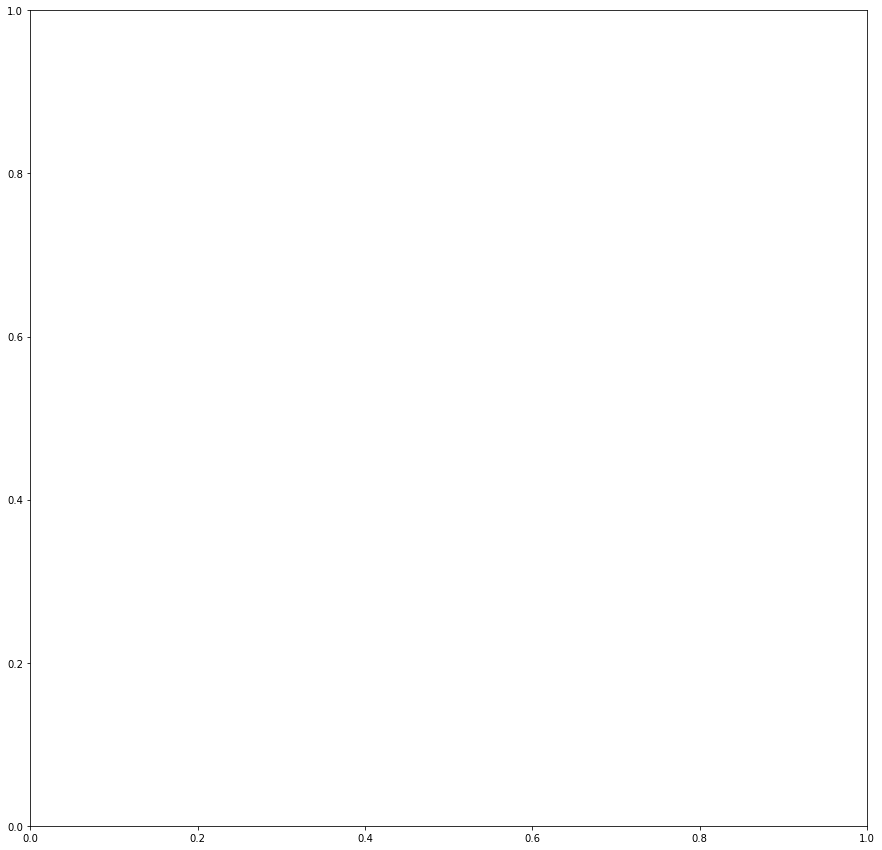

In [30]:
f, ax_2 = plt.subplots(figsize=(15,15))

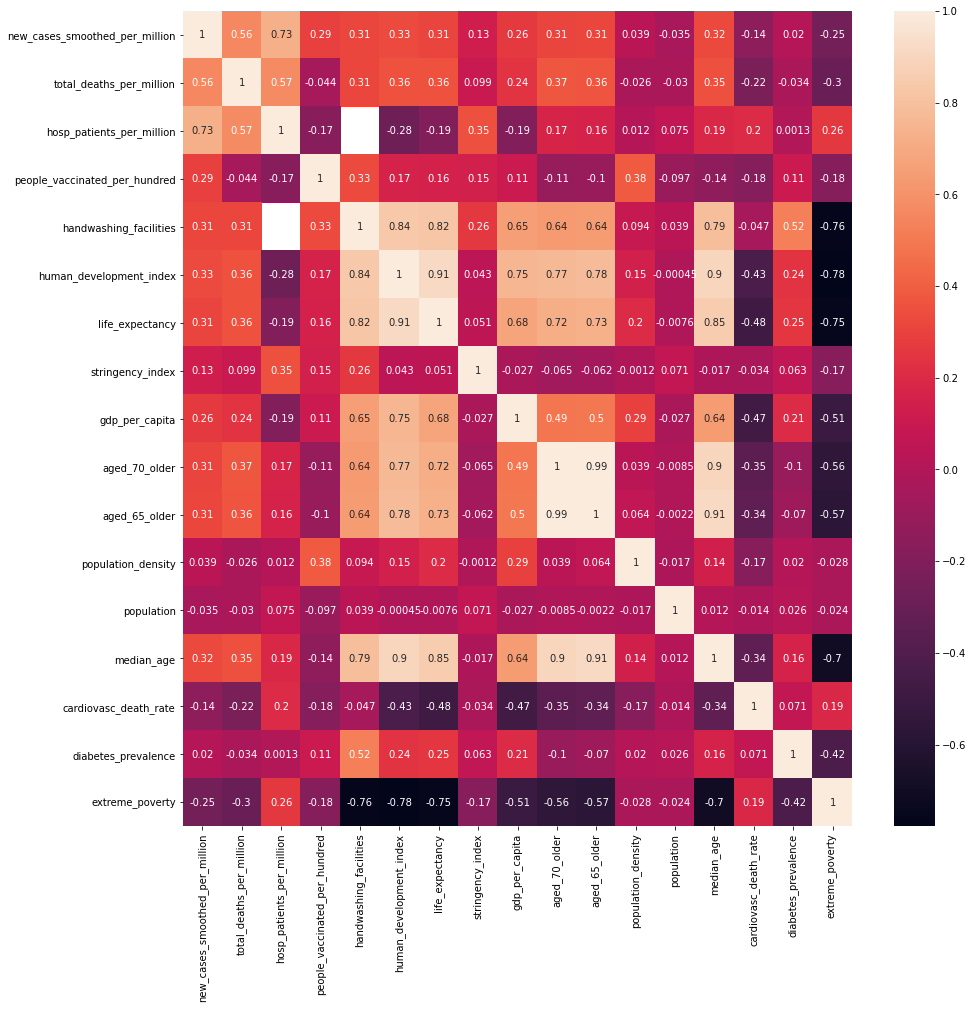

In [31]:
corr_refine_heat = sns.heatmap(corr_refine, annot = True, ax = ax_2)
corr_refine_heat.figure

This is a much more usable heatmap. There is high positive correlation between cases, deaths and hospitilisations which is to be expected. There is also high correlation between HDI, handwashing facilities and life expectancy, and a high negative correlation between these factors and extreme poverty. We can see a weak positive correlation between age variables (e.g aged_70_over) and total_deaths_per_million. I would of expected a higher correlation. There is also not much of a correlation between stringency_index and cases which is interesting. 

### Scatterplots

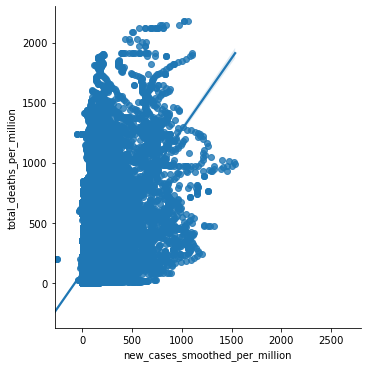

In [32]:
sns.lmplot(x = 'new_cases_smoothed_per_million', y = 'total_deaths_per_million', data = df_refine)

We can see a strong positive correlation between new cases and total deaths.

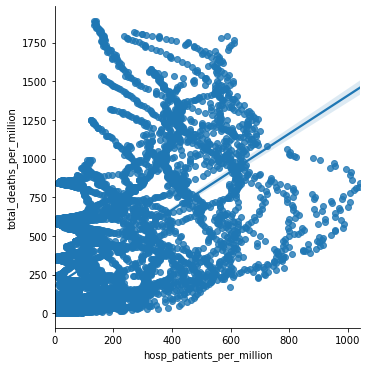

In [33]:
sns.lmplot(x = 'hosp_patients_per_million', y = 'total_deaths_per_million', data = df_refine)

We can see strong positive correlation between hopitalilisations and deaths.

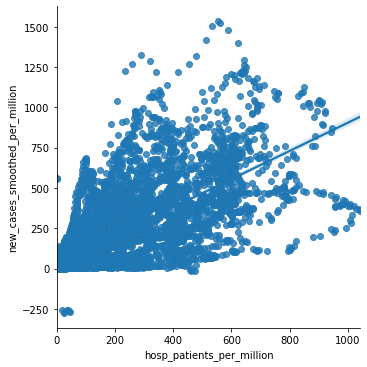

In [34]:
sns.lmplot(x = 'hosp_patients_per_million', y = 'new_cases_smoothed_per_million', data = df_refine)

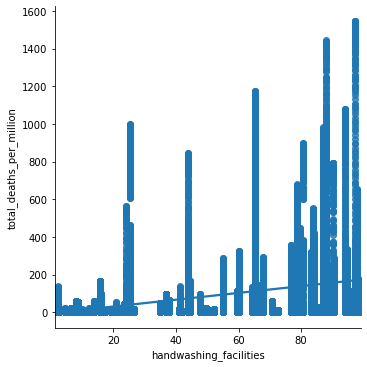

In [35]:
sns.lmplot(x = 'handwashing_facilities', y = 'total_deaths_per_million', data = df_refine)

Handwashing is a categorical variable, so I will analyise differently. 

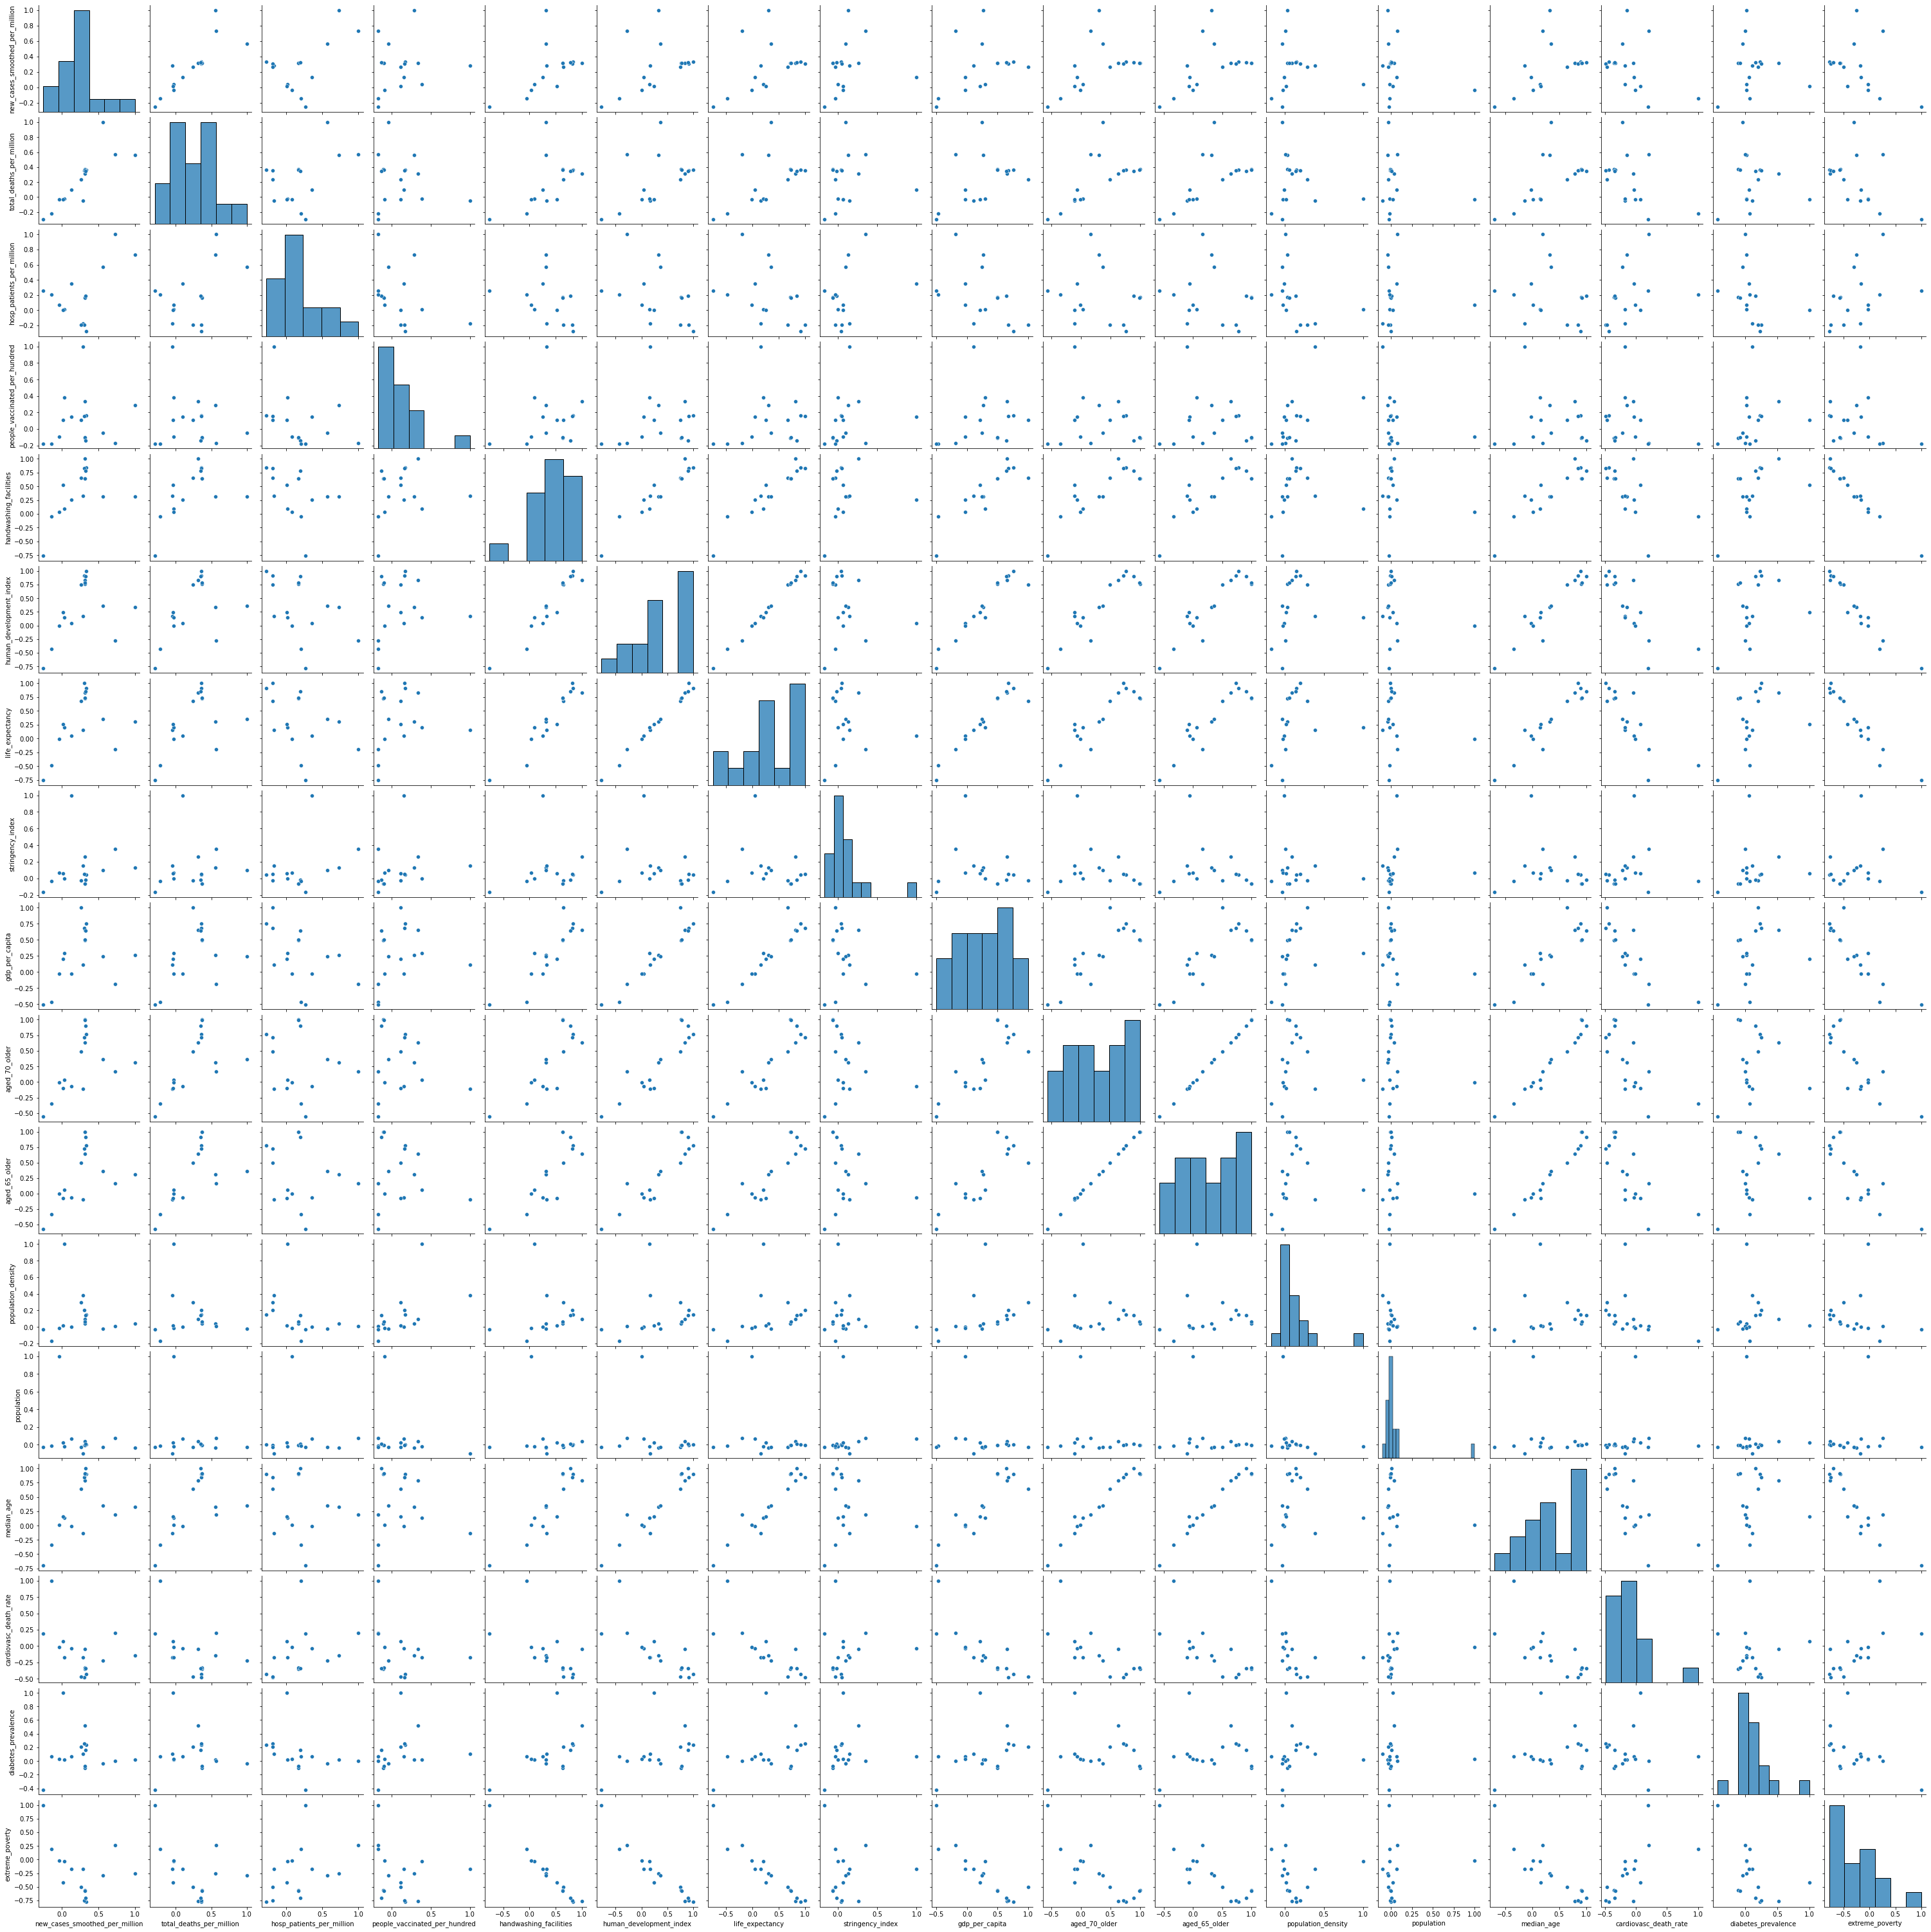

In [36]:
sns.pairplot(corr_refine)

Because I have so many variables I will do multiple pairplots.

### Covid variables  
"new_cases_smoothed_per_million",
"total_deaths_per_million",
"hosp_patients_per_million",
"people_vaccinated_per_hundred",

### Age factors  
"life_expectancy",
"aged_70_older",
"aged_65_older",
"median_age",

### Economic  
"handwashing_facilities",
"human_development_index",
"gdp_per_capita",
"extreme_poverty",

### Population  
"population_density",
"population",

### Health  
"cardiovasc_death_rate",
"diabetes_prevalence",
  
"stringency_index",


In [37]:
# Covid specific variables

sub = df_refine[["new_cases_smoothed_per_million",
"total_deaths_per_million",
"hosp_patients_per_million",
"people_vaccinated_per_hundred",
]]

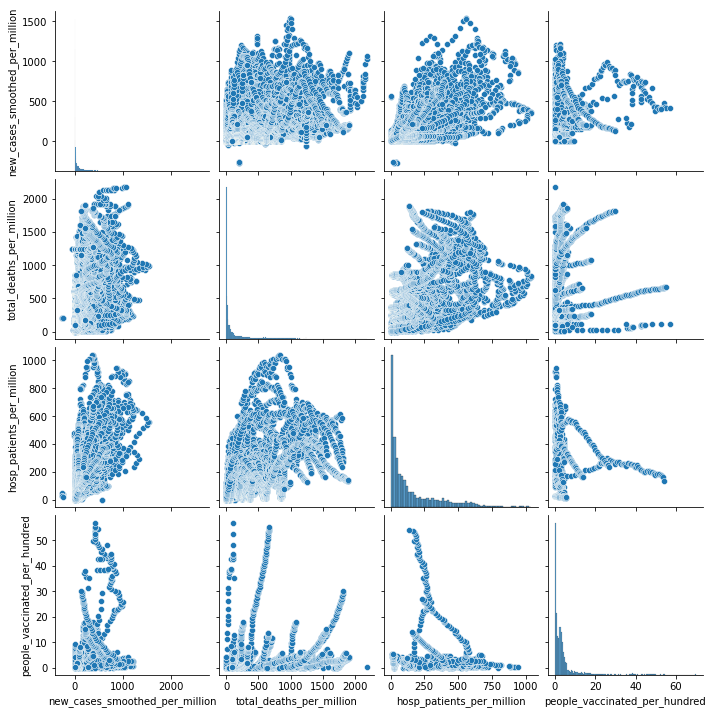

In [38]:
# Covid specific variables plotted

sub_plot = sns.pairplot(sub)

In [39]:
# one variable from each category

sub_2 = df_refine[["new_cases_smoothed_per_million", "aged_65_older", "handwashing_facilities", "population_density",
"cardiovasc_death_rate","stringency_index",
]]

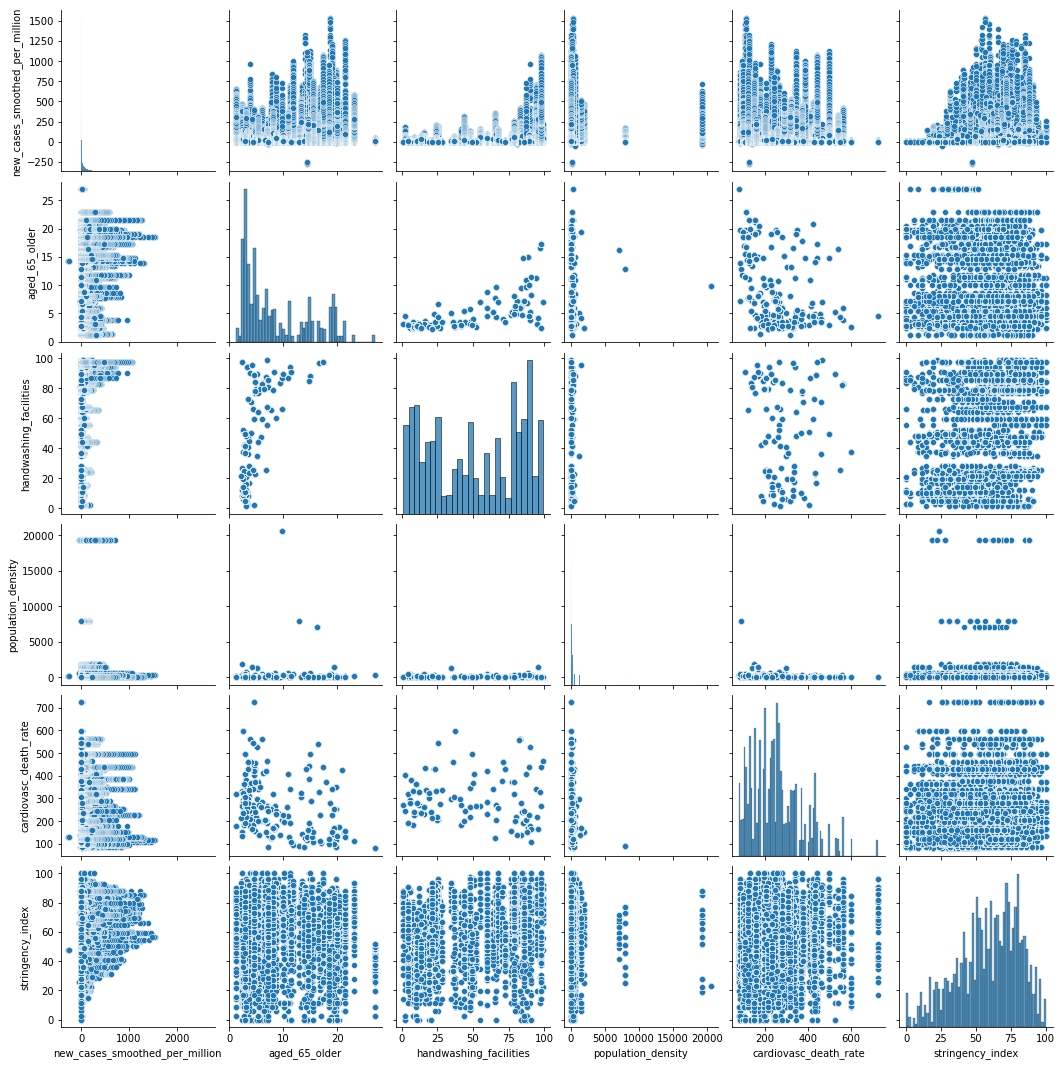

In [40]:
sub_2_plot = sns.pairplot(sub_2)

In [41]:
sub_3 = df_refine[["total_deaths_per_million","aged_65_older","gdp_per_capita","population_density","cardiovasc_death_rate",

"stringency_index"
]]

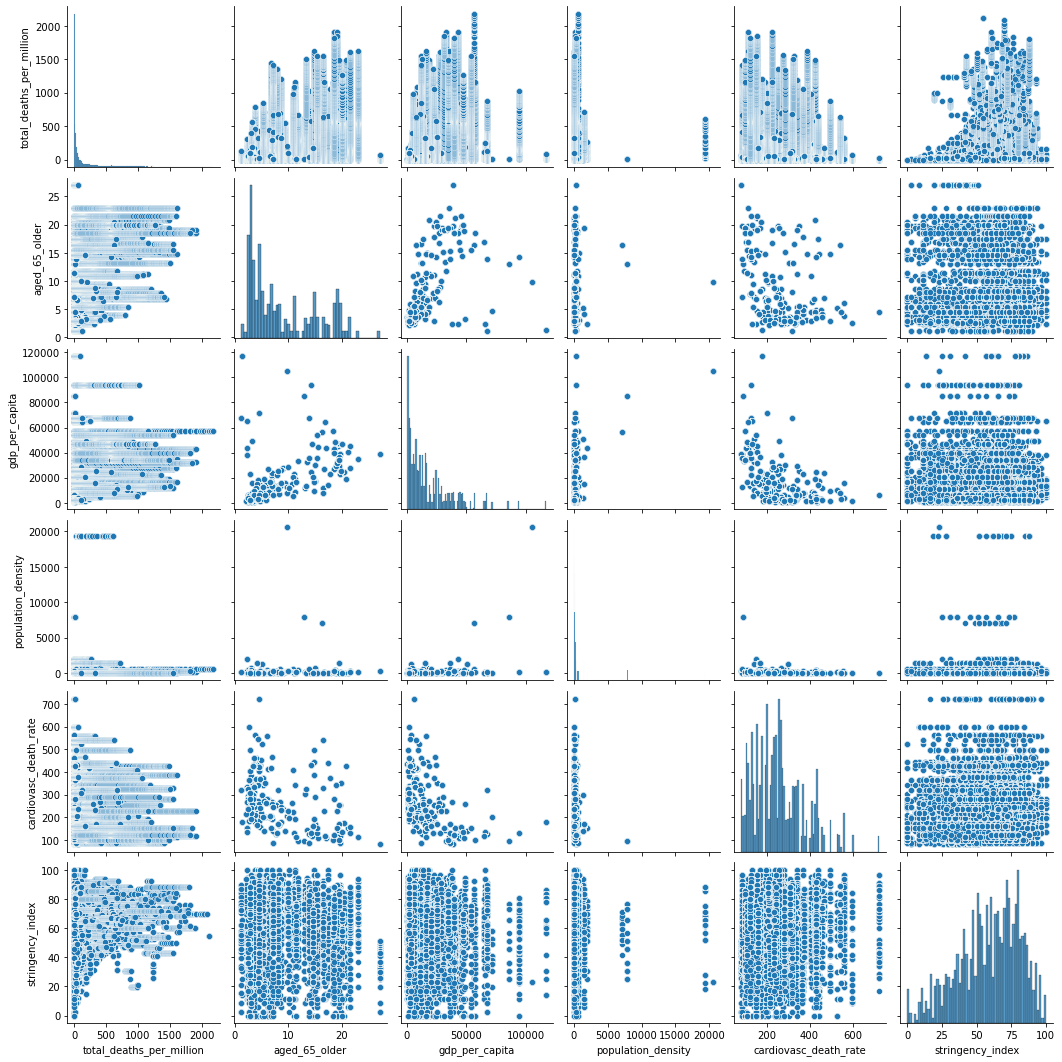

In [42]:
sub_3_plot = sns.pairplot(sub_3)

### Categorical plot

I will compare the categorical variables 'stringency_index' and 'aged_65_older' with the continuous variable 'total_deaths_per_million'

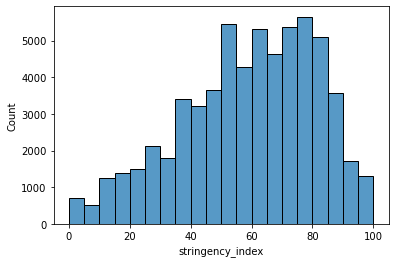

In [43]:
# histogram of stringency index
string_hist = sns.histplot(df_refine['stringency_index'], bins=20)

In [44]:
# low stringency flag
df_refine.loc[df_refine['stringency_index'] < 25, 'stringency_category'] = 'low stringency'

C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [45]:
# mid stringency flag
df_refine.loc[(df_refine['stringency_index'] >= 25) & (df['stringency_index'] < 50), 'stringency_category'] = 'mid stringency'

C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [46]:
# high stringency flag
df_refine.loc[(df_refine['stringency_index'] >= 50) & (df['stringency_index'] < 75), 'stringency_category'] = 'high stringency'

C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [47]:
# very high stringency flag
df_refine.loc[df_refine['stringency_index'] >= 75, 'stringency_category'] = 'very high stringency'

C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [48]:
df_refine['stringency_category'].value_counts()

high stringency         25058
very high stringency    17319
mid stringency          14195
low stringency           5362
Name: stringency_category, dtype: int64

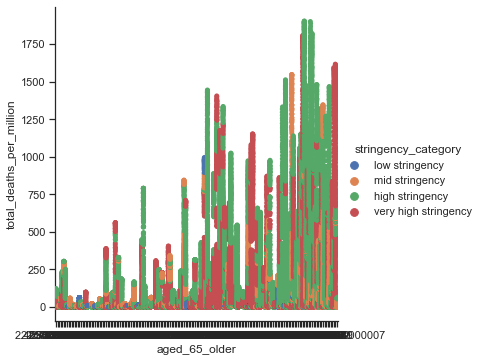

In [49]:
# categorical plot

sns.set(style='ticks')
cat = sns.catplot(x = 'aged_65_older', y = 'total_deaths_per_million', hue = 'stringency_category', data = df_refine)

The x axis is hard to intepret. Lots of values.

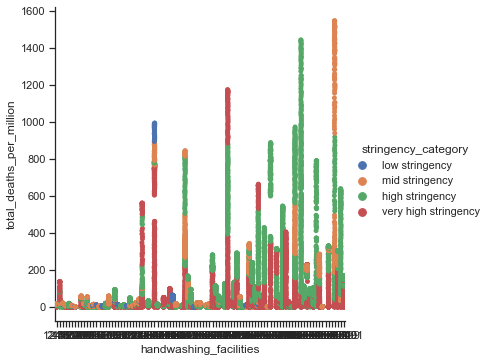

In [50]:
cat_2 = sns.catplot(x = 'handwashing_facilities', y = 'total_deaths_per_million', hue = 'stringency_category', data = df_refine)

Same with handwashing as the x variable. 

I will check the value counts for aged_65_older and create a flag for different age groups.

In [51]:
df_refine['aged_65_older'].value_counts()

6.933     707
11.198    426
6.857     426
11.373    423
13.914    406
         ... 
4.394     112
5.606     104
16.303     80
4.810      40
9.798      11
Name: aged_65_older, Length: 181, dtype: int64

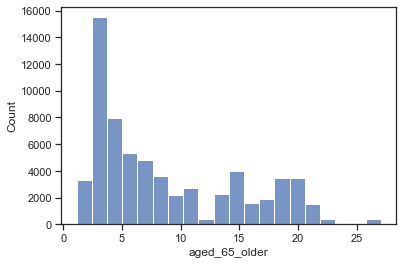

In [52]:
# histogram of aged_65_older
age_hist = sns.histplot(df_refine['aged_65_older'], bins=20)

I will create a flag for different age groups, and plot the flag column on the x axis instead of absolute values.

In [53]:
df_refine.loc[df_refine['aged_65_older'] < 5, 'aged_over_65'] = '< 5%'

C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [54]:
df_refine.loc[(df_refine['aged_65_older'] >= 5) & (df_refine['aged_65_older'] < 10), 'aged_over_65'] = '5-10%'

C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [55]:
df_refine.loc[(df_refine['aged_65_older'] >= 10) & (df_refine['aged_65_older'] < 15), 'aged_over_65'] = '10-15%'

C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [56]:
df_refine.loc[(df_refine['aged_65_older'] >= 15) & (df_refine['aged_65_older'] < 20), 'aged_over_65'] = '15-20%'

C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [57]:
df_refine.loc[df_refine['aged_65_older'] >=20, 'aged_over_65'] = '> 20%'

C:\Users\Kieran\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


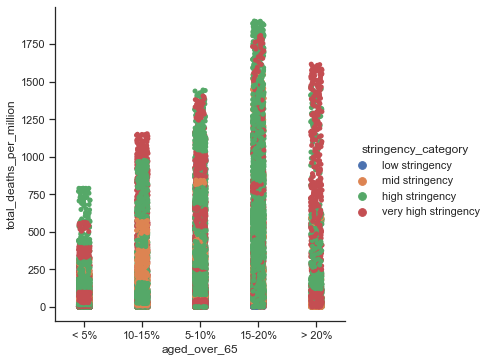

In [58]:
cat_3 = sns.catplot(x = 'aged_over_65', y = 'total_deaths_per_million', hue = 'stringency_category', data = df_refine)

This is a more useful catplot. 

### Questions from initial project plan
•	How is the stringency of countries lockdowns related to cases of covid-19?  
•	How is the population density of countries related to cases of covid-19?  
•	How are HDI ratings related to covid-19 deaths?  
•	How does gdp per capita relate to covid-19 deaths?  
•	What is the effect of vaccinations on the reproduction rate of covid-19?  
•	How do rates of covid-19 compare amongst countries with a similar population?  
•	How do rates of cardiovascular disease effect hospitalisations due to covid-19?  


#### How is the stringency of countries lockdowns related to cases of covid-19? 

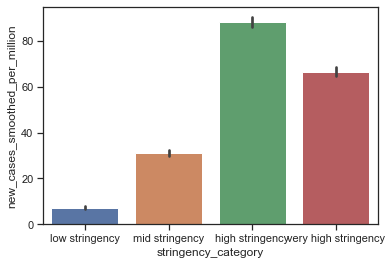

In [59]:
string_bar = sns.barplot(x = 'stringency_category', y = 'new_cases_smoothed_per_million', data = df_refine)

There does seem to be a link between stringency of lockdowns and cases of covid. So far I have grouped records by their stringency index but this does not account for time. This would be interesting as countries have changed their lockdown strategies over time and this is likely to impact covid cases. We can see in the string_hist that countries have experienced a wide range of measures. It would be interesting to compare the stringency levels of similiar countries over time, to see if there is a clear relationship.  

#### How is the population density of countries related to cases of covid-19?  

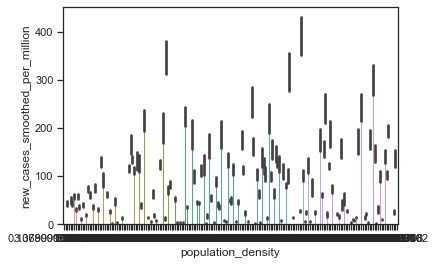

In [60]:
pop_bar = sns.barplot(x = 'population_density', y = 'new_cases_smoothed_per_million', data = df_refine)

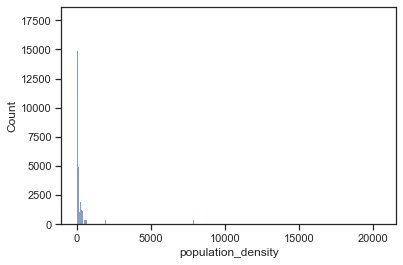

In [61]:
# pop_density hist
pop_dens_hist = sns.histplot(df_refine['population_density'], bins=500)

Most values seem to be below 5000, but it is hard to see. I will check stats on the column.

In [62]:
df_refine['population_density'].describe()

count    67385.000000
mean       327.206411
std       1591.849295
min          0.137000
25%         36.253000
50%         82.805000
75%        208.354000
max      20546.766000
Name: population_density, dtype: float64

In [63]:
high_dens = df_refine[df_refine['population_density'] > 10000]

In [64]:
high_dens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 38829 to 43036
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   continent                       378 non-null    object 
 1   location                        378 non-null    object 
 2   date                            378 non-null    object 
 3   new_cases_smoothed_per_million  362 non-null    float64
 4   total_deaths_per_million        338 non-null    float64
 5   hosp_patients_per_million       0 non-null      float64
 6   people_vaccinated_per_hundred   0 non-null      float64
 7   handwashing_facilities          0 non-null      float64
 8   human_development_index         0 non-null      float64
 9   life_expectancy                 378 non-null    float64
 10  stringency_index                363 non-null    float64
 11  gdp_per_capita                  11 non-null     float64
 12  aged_70_older                 

In [65]:
high_dens['location'].value_counts()

Monaco    367
Macao      11
Name: location, dtype: int64

Monaco and Macao are heavily skewing the pop density variable.

In [66]:
df_no_mon = df_refine[df_refine['population_density'] < 10000]

<AxesSubplot:xlabel='population_density', ylabel='Count'>

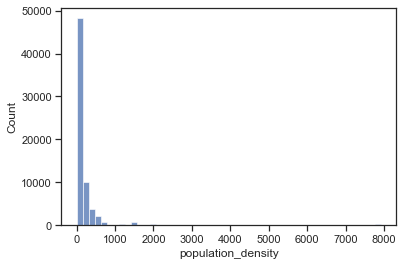

In [67]:
sns.histplot(df_no_mon['population_density'], bins = 50)

In [68]:
#df with pop density < 1000

df_main_dens = df_refine[df_refine['population_density'] <= 1000]

<AxesSubplot:xlabel='population_density', ylabel='Count'>

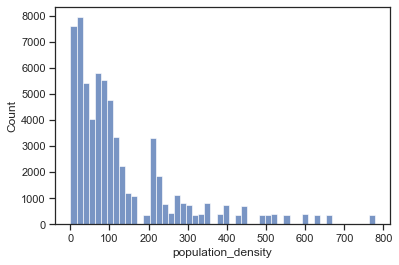

In [69]:
sns.histplot(df_main_dens['population_density'], bins=50)

I will come back to analysing population_density and covid cases later in my analysis. 

#### Define any hypotheses I can at this point

I cant really define any hypotheses yet as I need to complete further analysis related to my initial questions. The task has not so far covered my initial questions. 

### Export df

In [70]:
df_refine.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_inc_flags.csv'))